In [12]:
import pandas as pd
import numpy as np

In [13]:
from pandas import read_excel
#my_sheet_name = 'sheet1' 
df = read_excel('To Aditya.xlsx')
df.columns = ['Time', 'Typical_Demand','National_Grid_day1','National_Grid_day2','National_Grid_day3','National_Grid_day4','National_Grid_day5','National_Grid_day6','National_Grid_day7']
df.head()

,Time,Typical_Demand,National_Grid_day1,National_Grid_day2,National_Grid_day3,National_Grid_day4,National_Grid_day5,National_Grid_day6,National_Grid_day7
0,00:00-00:15,4300,1891.29,2298.21,2370.65,2397.50,2373.42,2571.50,2514.62
1,00:15-00:30,4200,1798.89,2304.10,2370.43,2328.16,2360.01,2360.63,2510.25
2,00:30-00:45,4125,1830.73,2345.98,2294.40,2290.49,2417.82,2473.69,2519.63
3,00:45-01:00,4000,1905.34,2182.29,2328.21,2266.35,2419.42,2474.28,2525.70
4,01:00-01:15,3875,1945.35,1871.50,2351.73,2153.36,2388.80,2459.70,2518.39


In [14]:
df_day_1 = df[['Time','Typical_Demand','National_Grid_day1']]

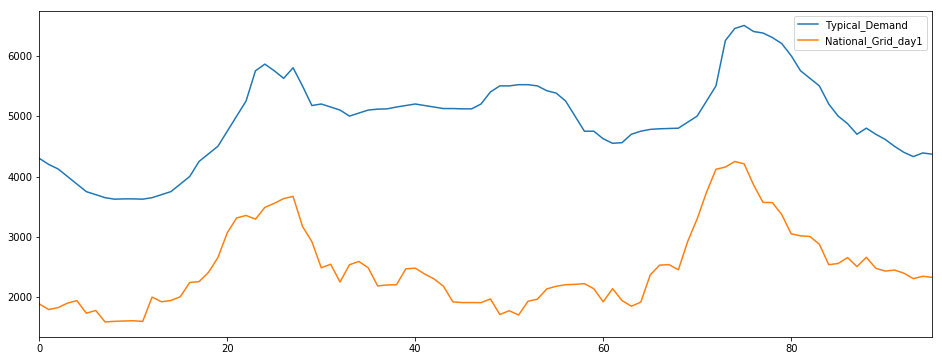

In [15]:
%matplotlib inline
df_day_1.plot(figsize = (16,6))

In [17]:
National_Grid =  df_day_1['National_Grid_day1'].sum()

In [18]:
National_Grid_Mwh = National_Grid/4

In [22]:
power_generated_by_the_state_in_day1 = 50.07*1000

In [23]:
Total_consumption_in_a_day = National_Grid_Mwh + power_generated_by_the_state_in_day1
print('Total consumption by a state in day1 in Mwh',Total_consumption_in_a_day)

Total consumption by a state in day1 in Mwh 109947.55


In [24]:
Total_typical_day = df_day_1['Typical_Demand'].sum() / 4
print('Total of typical day curve', Total_typical_day)

Total of typical day curve 118691.25


In [25]:
df_day_1['adjusted_values'] = df_day_1['Typical_Demand'] * (Total_consumption_in_a_day/Total_typical_day)

/home/adi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


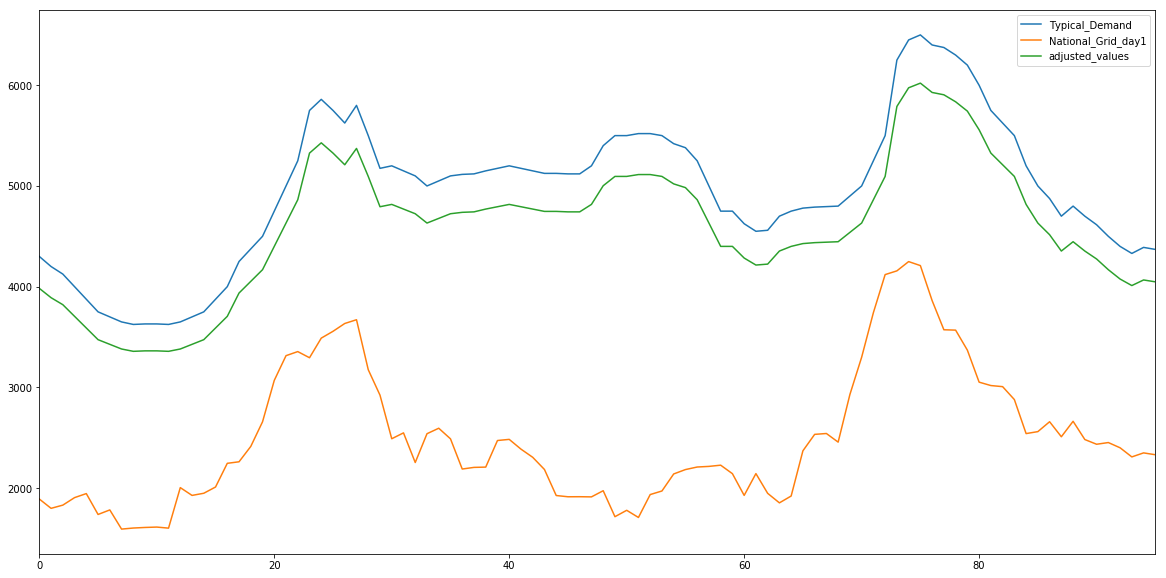

In [26]:
df_day_1.plot(figsize = (20,10))

In [14]:
def objective(x):
    for i in range(0,96):
        
        return np.square(adjusted[i] - (NG[i]+x[i])).sum()
                 
    ##defining the constariants

def constraint1(x):
    return 3656 -  NG[12] - x[12]


def constraint2(x):
    return 6058 - NG[76] - x[76]


def constraint3(x):
    state_prod = 0
    for i in range(96):
        state_prod = state_prod + x[i]
    return 47480 - state_prod/4


def constraint4(x):
    total_power = 0
    for i in range(96):
        total_power = total_power + x[i] + NG[i]
    return 114943.64249999999 - total_power/4 

In [15]:
import numpy as np
adjusted = df_day_1['adjusted_values']
adjusted = np.array(adjusted)

NG = df_day_1['National_Grid_day2']
NG = np.array(NG)

x0 = NG

In [16]:
print(objective(x0))

121860398.22319731


In [17]:
bnds = [(0, 3000)]*96

In [18]:
con1 = {'type':'eq', 'fun': constraint1}
con2 = {'type':'eq', 'fun': constraint2}
con3 = {'type':'eq', 'fun': constraint3}
con4 = {'type':'eq', 'fun': constraint4}
cons = [con1,con2,con3,con4]

In [19]:
from scipy.optimize import minimize

In [20]:
solution = minimize(objective, x0, method = 'SLSQP', bounds = bnds, constraints=cons)

In [21]:
print(solution)

     fun: 34287.86525262483
     jac: array([ 1.81152344e-01,  4.16992188e-01,  4.73535156e+00,  3.51074219e-01,
        3.53027344e-01,  3.46191406e-01,  3.61328125e-01,  3.58886719e-01,
        3.43750000e-01,  3.43261719e-01,  3.51074219e-01,  3.48632812e-01,
        2.42493164e+02,  3.48632812e-01,  3.62304688e-01,  3.56933594e-01,
        3.52539062e-01,  3.51074219e-01,  3.50097656e-01,  3.51562500e-01,
        3.54980469e-01,  3.54980469e-01,  3.62792969e-01,  3.53027344e-01,
        3.44726562e-01,  3.51074219e-01,  3.53027344e-01,  3.55468750e-01,
        3.59863281e-01,  3.55957031e-01,  3.62304688e-01,  3.59375000e-01,
        3.52539062e-01,  3.56445312e-01,  3.52539062e-01,  3.50585938e-01,
        3.61328125e-01,  3.51074219e-01,  3.56933594e-01,  3.55468750e-01,
        3.51562500e-01,  3.41796875e-01,  3.51074219e-01,  3.45214844e-01,
        3.54003906e-01,  3.50585938e-01,  3.53027344e-01,  3.49609375e-01,
        3.44238281e-01,  3.50585938e-01,  3.46191406e-01,  3.5

In [22]:
sol = []
for i in range(96):
    sol.append(solution.x[i])
    
print(sol) 
sol = np.array(sol)

[1866.1106823289138, 1763.496041277393, 1651.1431767940178, 1691.5878010729084, 1881.3255983382428, 1732.0990879043597, 1688.1453879073588, 1618.6629139030767, 1563.164521777339, 1553.2365802602549, 1552.7403219050025, 1550.7771781809176, 1432.2199999999998, 1125.4090039688529, 1384.167053775953, 1505.387572538778, 1588.3485406487189, 1608.044184167061, 1725.11695535088, 1817.440968269551, 1596.2489260860282, 1626.0152902024852, 1777.1657275627651, 2141.4236667477294, 1893.9763878202862, 1544.272636200088, 1352.4704414270486, 1475.7760155332578, 1346.1206499807095, 968.5003949369554, 1447.844134404712, 1472.0014551626145, 1730.5167469512398, 1718.0362293284104, 1856.5555468071605, 1964.9856857360367, 2072.4175845510413, 2105.3046351736666, 2161.220184624834, 2235.8699975947748, 2315.538711594738, 2294.2932641221273, 2272.5471755943786, 2270.03382260783, 2300.8780103977797, 2346.074328168409, 2455.885559515306, 2533.697859603448, 2777.3702038617967, 2870.5660659867717, 2874.673820212538

In [23]:
df_day_1['state'] = sol.reshape(96,1)

/home/adi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
df_day_1['estimated_curve'] = df_day_1['state'] + df_day_1['National_Grid_day2']

/home/adi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


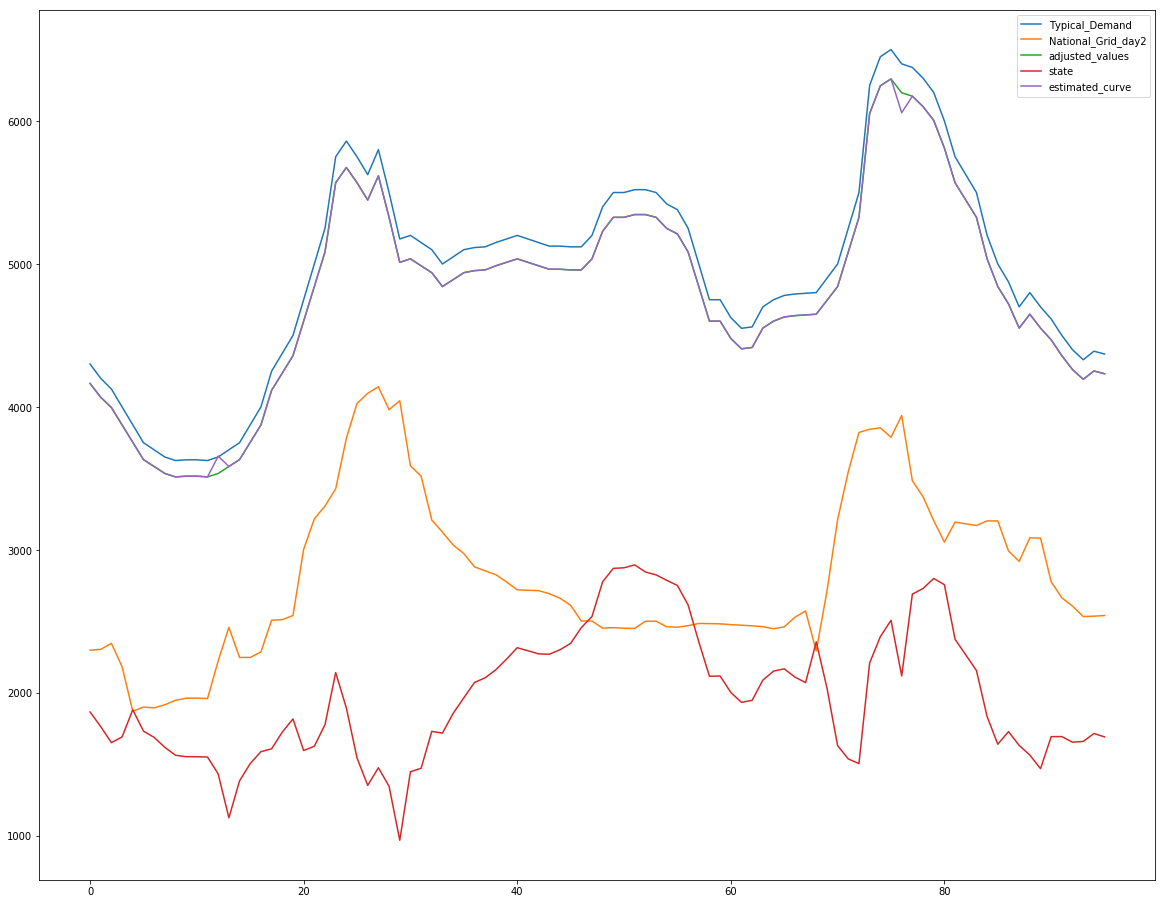

In [26]:
df_day_1.plot(figsize=(20,16))

In [27]:
df_day_1['estimated_curve'].sum()/4

114943.64249999999

In [28]:
new_data = df_day_1[['Time','estimated_curve']]

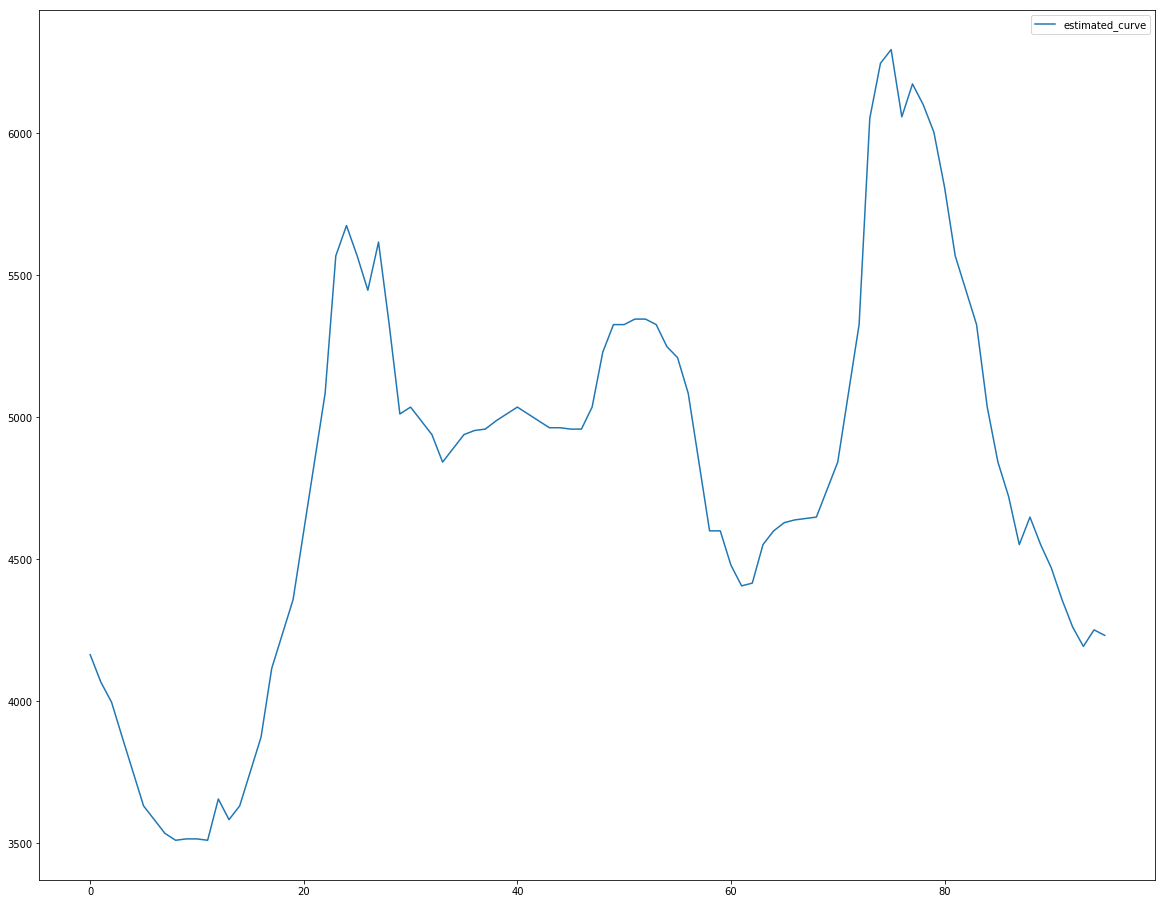

In [29]:
new_data.plot(figsize=(20,16))

In [31]:
df_day_1.head(100)

,Time,Typical_Demand,National_Grid_day2,adjusted_values,state,estimated_curve
0,00:00-00:15,4300,2298.21,4164.229990,1866.110682,4164.320682
1,00:15-00:30,4200,2304.10,4067.387432,1763.496041,4067.596041
2,00:30-00:45,4125,2345.98,3994.755513,1651.143177,3997.123177
3,00:45-01:00,4000,2182.29,3873.702316,1691.587801,3873.877801
4,01:00-01:15,3875,1871.50,3752.649119,1881.325598,3752.825598
5,01:15-01:30,3750,1899.67,3631.595921,1732.099088,3631.769088
6,01:30-01:45,3700,1895.21,3583.174642,1688.145388,3583.355388
7,01:45-02:00,3650,1916.27,3534.753363,1618.662914,3534.932914
8,02:00-02:15,3625,1947.55,3510.542724,1563.164522,3510.714522
9,02:15-02:30,3630,1962.32,3515.384852,1553.236580,3515.556580
